# PublicDatasets (Analyser)

## 1. Re-reading

In [21]:
special_separator = '___'

In [22]:
import pandas as pd
import seaborn as sns 

In [23]:
mentions_table = pd.read_csv('data/DatasetMentions_Processed.csv',index_col=0, sep=';')

In [77]:
# mentions_table[mentions_table['Mention Style']=='URL']
mentions_table

,Venue,Paper Title,Dataset Identifier,Mention Style,Mention,Access,Notes
0,CHIL 2021,Data Augmentation for Electrocardiograms,MGH Dataset 1,Excluded,NaN,Private,data and code availability we use three\ndatas...
1,CHIL 2021,Data Augmentation for Electrocardiograms,MGH Dataset 2,Excluded,NaN,Private,NaN
2,CHIL 2021,Data Augmentation for Electrocardiograms,PTB-XL,Inline Citation,"wagner et al., 2020",Open,NaN
3,CHIL 2021,Data Augmentation for Electrocardiograms,[Repository] PhysioNet,Inline Citation,"goldberger et al., 2000",Open,Repository of dataset has been cited.
4,CHIL 2021,Data Augmentation for Electrocardiograms,[Paper Dataset],URL,https://github.com/aniruddhraghu/ecg_aug,Open,[Paper Dataset] indicates a paper’s own datase...
...,...,...,...,...,...,...,...
57,CHIL 2021,Identification of Subgroups With Similar Benef...,[Repository] PhysioNet,Inline Citation,"goldberger et al., 2000",Open,NaN
58,CHIL 2021,PhysioMTL: Personalizing Physiological Pattern...,AHMS,Inline Citation,"apple, 2019",Private,data and code availability the study in this\n...
59,CHIL 2021,PhysioMTL: Personalizing Physiological Pattern...,MMASH,Inline Citation,"rossi et al., 2020",Open,NaN
60,CHIL 2021,PhysioMTL: Personalizing Physiological Pattern...,MMASH,URL,https://github.com/rossialessio/mmash,Open,NaN


In [25]:
# mentions_table['Origin']
# mentions_table['Mention Style']
mentions_table.groupby(['Paper Title','Dataset Identifier']).count()

Venue  \
Paper Title                                        Dataset Identifier                                          
ADCB: An Alzheimer’s disease simulator for benc... ADNI                                                    1   
                                                   ADNI Investigators                                      1   
                                                   [Paper Dataset]                                         1   
Context-Sensitive Spelling Correction of Clinic... CSpell                                                  1   
                                                   MIMIC-III                                               1   
                                                   MIMIC-III spelling correction                           1   
                                                   [Repository] PhysioNet                                  1   
                                                   cim-misspelling                                         1   
Counterfactually Guided Policy Transfer in Clin... Sepsis Simulator                                        2   
                                                   [Paper Dataset]                                         1   
Data Augmentation for Electrocardiograms           MGH Dataset 1                                           1   
                                                   MGH Dataset 2                                           1   
                                                   PTB-XL                                                  1   
                                                   [Paper Dataset]                                         1   
                                                   [Repository] PhysioNet                                  1   
Enriching Unsupervised User Embedding via Medic... MIMIC-III                                               2   
                                                   [Paper Dataset]                                         1   
                                                   n2c2                                                    2   
Estimating Model Performance on External Sample... IMRD                                                    1   
                                                   [Paper Dataset]                                         1   
Evaluating Domain Generalization for Survival A... [Repository] Clinical Trials                            1   
Graph-Text Multi-Modal Pre-training for Medical... MIMIC-III                                               1   
                                                   MIMIC-III (PhysioNet)                                   1   
                                                   [Paper Dataset]                                         1   
Identification of Subgroups With Similar Benefi... MIMIC-III                                               1   
                                                   [Repository] PhysioNet                                  1   
Improving the Fairness of Chest X-ray Classifiers  CheXpert                                                1   
                                                   MIMIC-CXR                                               1   
                                                   MIMIC-IV                                                1   
                                                   [Paper Dataset]                                         1   
                                                   [Repository] PhysioNet                                  1   
Lead-agnostic Self-supervised Learning for Loca... PTB-XL                                                  1   
                                                   PhysioNet 2021 (Computing in Cardiology Challen...      1   
                                                   [Paper Dataset]                                         1   
Learning Unsupervised Representations for ICU T... HiRID               

In [26]:
color_palette=[
    "#F5793A", "#A95AA1", "#85C0F9", "#0F2080"
]

In [27]:
sns.set(rc={"figure.figsize":(20, 3)})

## 2. Dataset Identifier vs. Citation Style

In [62]:
sns.set(rc={"figure.figsize":(8, 6)})

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


[Text(0.5, 1.0, 'Datasets by how they were mentioned')]

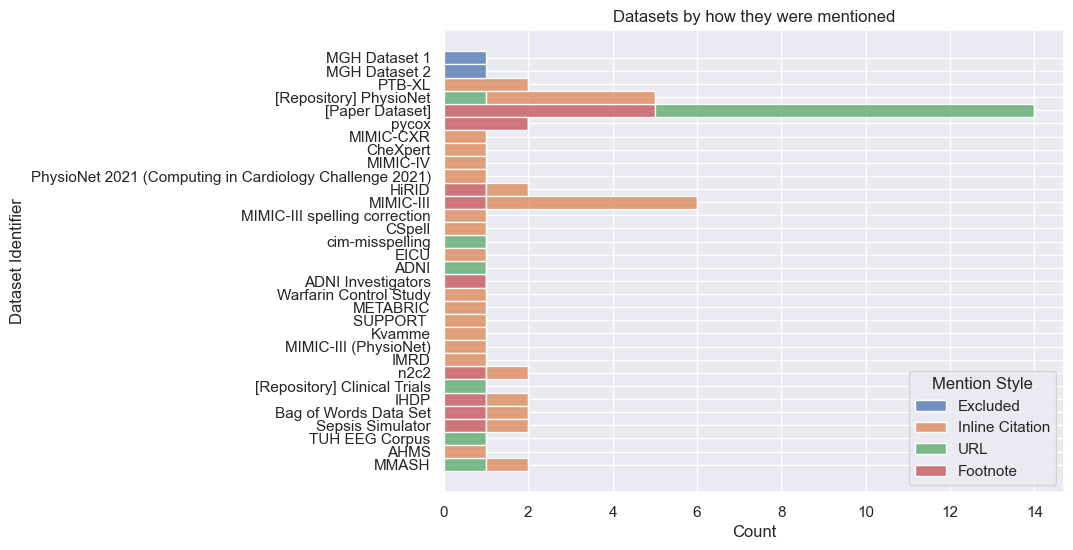

In [63]:
sns.histplot(data=mentions_table, y="Dataset Identifier", hue="Mention Style", multiple="stack").set(title='Datasets by how they were mentioned')

## 3. Accesibility

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


[Text(0.5, 1.0, 'Mention Access')]

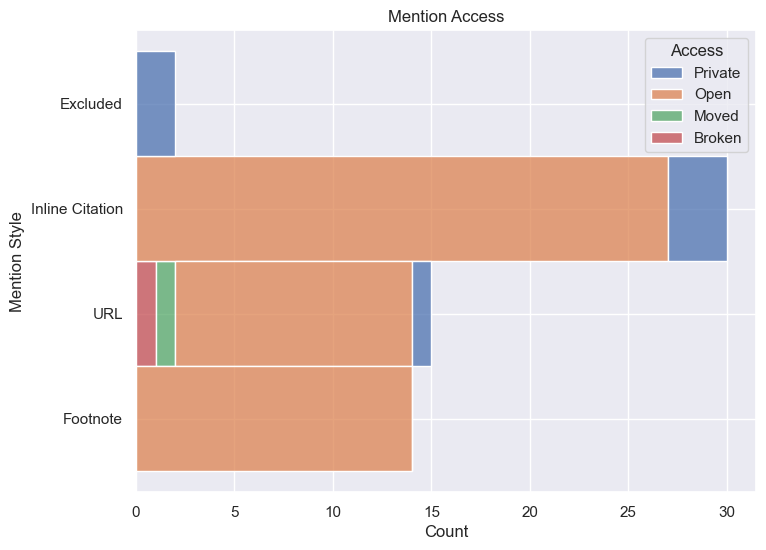

In [64]:
selection_table = mentions_table.copy()
# selection_table['Link Access'] = selection_table['Link Access'].fillna('Not Available')
sns.histplot(data=selection_table, y="Mention Style", hue="Access", multiple="stack").set(title='Mention Access')

## 4. Broken Links

In [65]:
sns.set(rc={"figure.figsize":(8, 6)})

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


[Text(0.5, 1.0, 'Mention Access')]

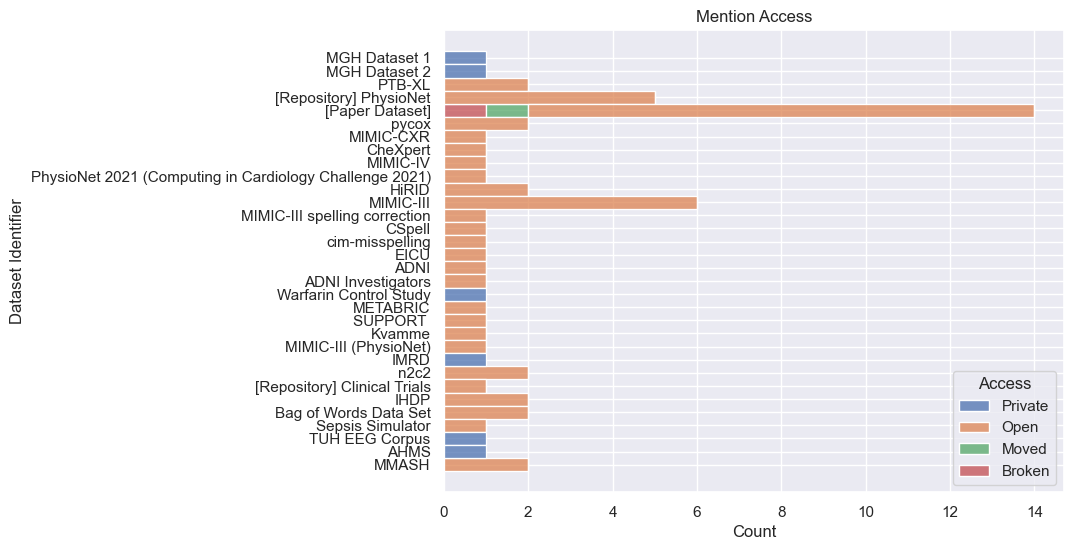

In [66]:
selection_table = mentions_table.copy()
# selection_table['Link Access'] = selection_table['Link Access'].fillna('Not Available')
sns.histplot(data=selection_table, y="Dataset Identifier", hue="Access", multiple="stack").set(title='Mention Access')

## 5. Dataset Citation Frequency

In [67]:
sns.set(rc={"figure.figsize":(20, 20)})

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


[Text(0.5, 1.0, 'Datasets by reference')]

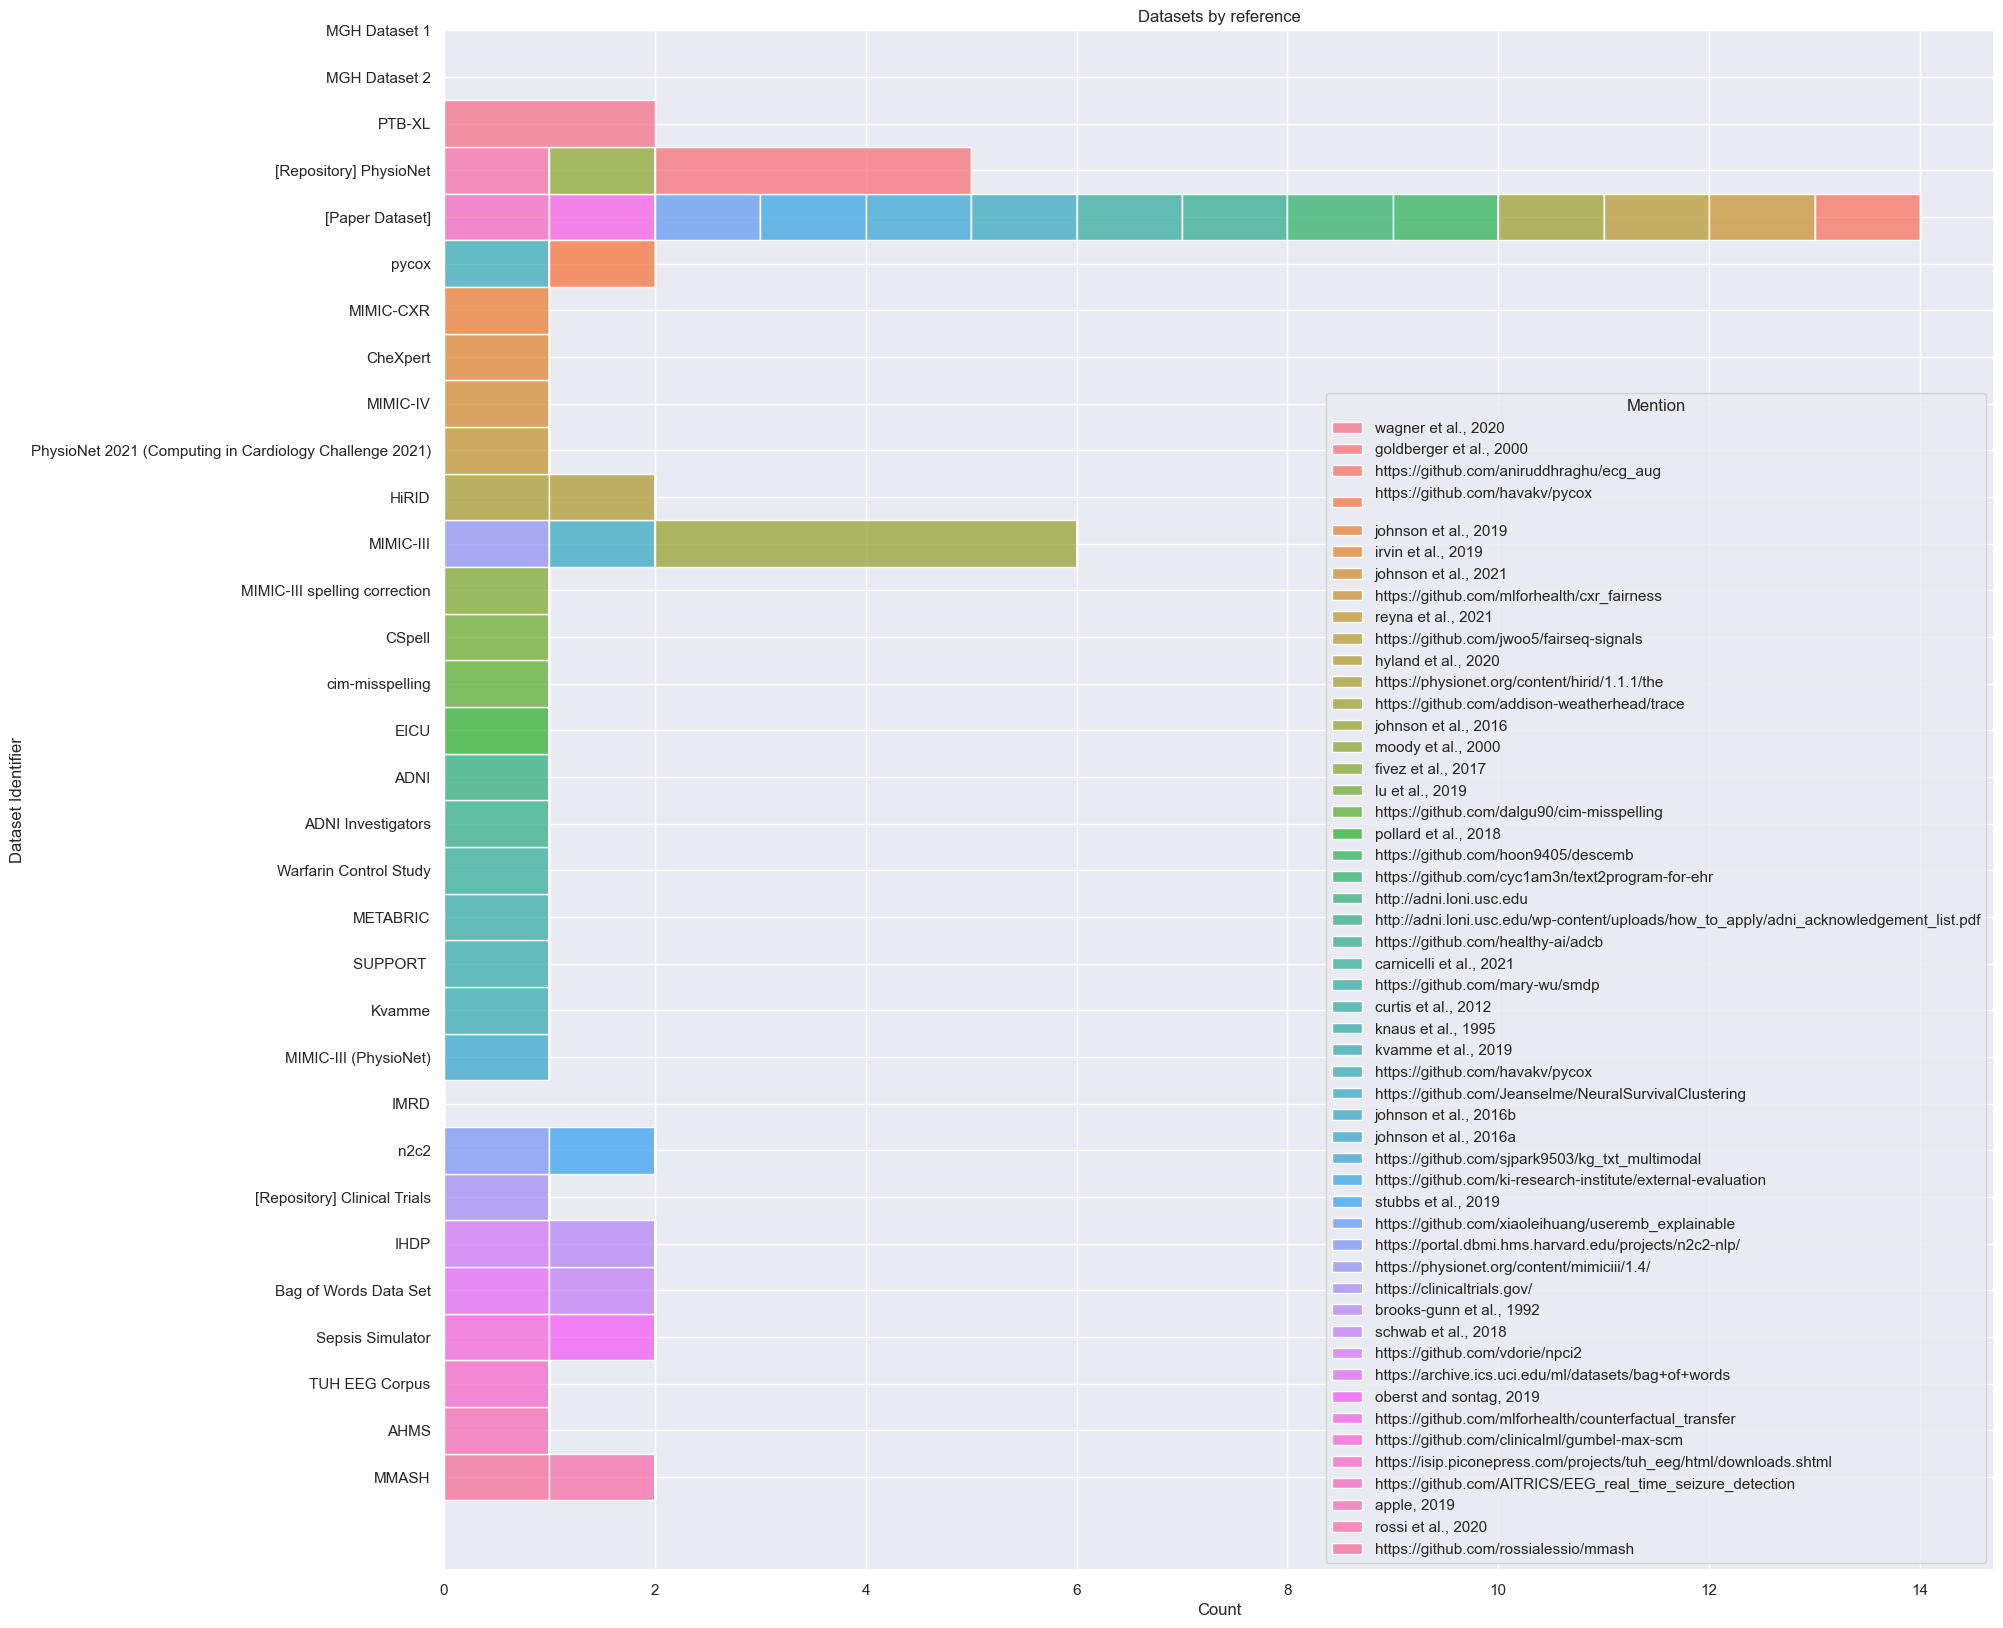

In [68]:
sns.histplot(data=mentions_table, y="Dataset Identifier", hue="Mention", multiple="stack").set(title='Datasets by reference')

## LEGACY

## 2. Venue vs. Citation Style

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='Count', ylabel='Venue'>

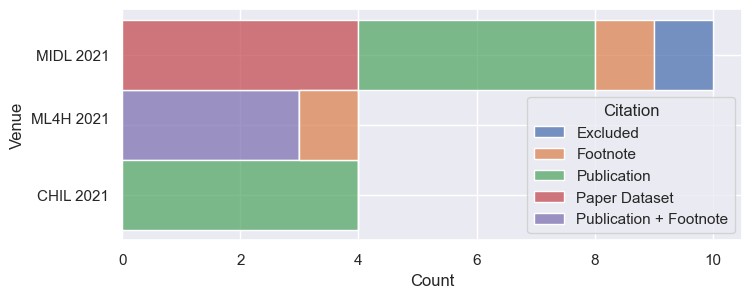

In [117]:
sns.histplot(data=mentions_table, y="Venue", hue="Citation", multiple="stack")

<AxesSubplot:xlabel='Count', ylabel='Citation'>

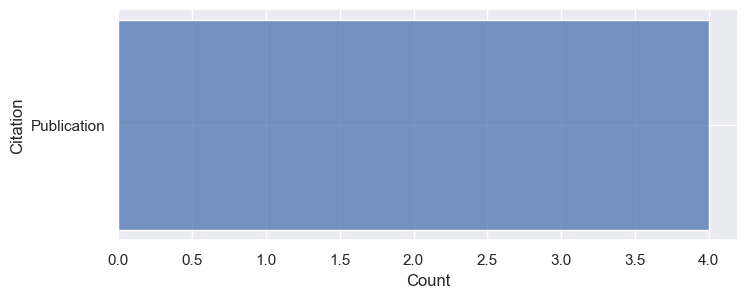

In [118]:
selection_table = mentions_table[mentions_table['Venue']=='CHIL 2021']
sns.histplot(data=selection_table, y="Citation", multiple="stack")

## 3. Origin vs. Citation Style

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='Count', ylabel='Origin'>

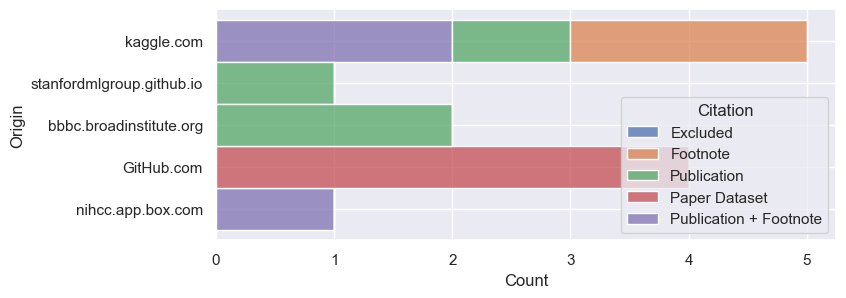

In [119]:
sns.histplot(data=mentions_table, y="Origin", hue="Citation", multiple="stack")

## 4. Broken Links

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='Count', ylabel='Origin'>

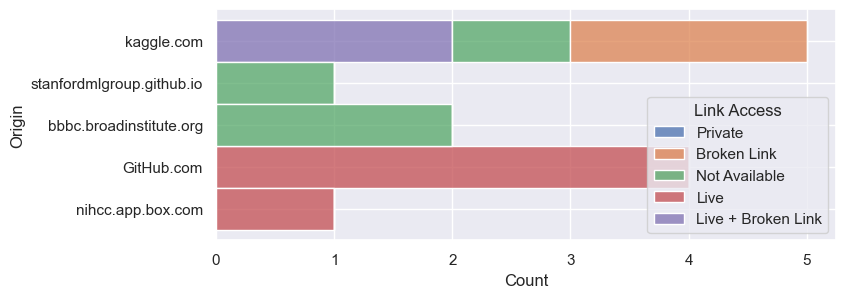

In [120]:
selection_table = mentions_table.copy()
selection_table['Link Access'] = selection_table['Link Access'].fillna('Not Available')
sns.histplot(data=selection_table, y="Origin", hue="Link Access", multiple="stack")

In [113]:
# mentions_table['Link Access']

## 5. Challenge vs. Non-Challenge Datasets

In [121]:
selection_table = mentions_table.copy()
contests = (selection_table['Origin']=='kaggle.com')
selection_table['Contest Mention'] = contests
bibs = (-selection_table['Bibliography'].isnull()) 
selection_table['In Bibliography'] = bibs

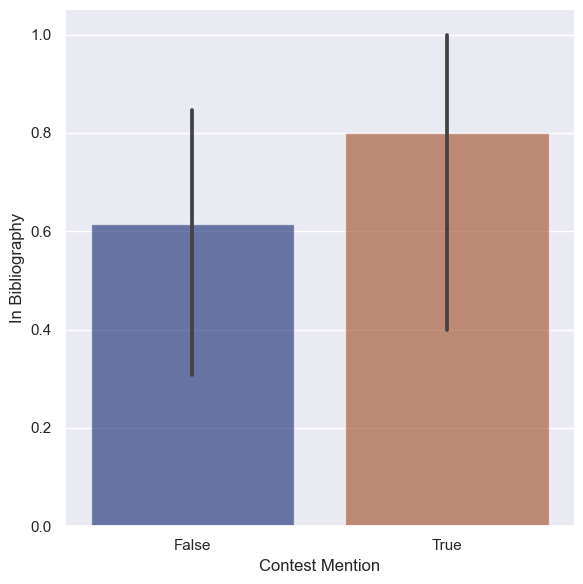

In [122]:
sns.catplot(
    data=selection_table, kind="bar",
    x="Contest Mention", y="In Bibliography", #hue="sex",
    #errorbar="sd",
    palette="dark", alpha=.6, height=6
)

In [123]:
selection_table.head()

,Venue,Title,Dataset Identifier,Citation,Link,Link Access,Bibliography,Publication Access,Origin,Access Notes,Contest Mention,In Bibliography
1,MIDL 2021,GOAL: Gist-set Online Active Learning for Effi...,AO & LL,Excluded,NaN,Private,NaN,NaN,NaN,"For the 1st case, we use our private datasets ...",False,False
2,MIDL 2021,GOAL: Gist-set Online Active Learning for Effi...,RSNA Pneumonia Detection Challenge,Footnote,https://www.kaggle.com/c/rsna-pneumonia-detection,Broken Link,NaN,NaN,kaggle.com,The link is misformatted: https://www.kaggle.c...,True,False
3,MIDL 2021,GOAL: Gist-set Online Active Learning for Effi...,CheXpert,Publication,NaN,NaN,"Jeremy Irvin, Pranav Rajpurkar, Michael Ko, Yi...",Open,stanfordmlgroup.github.io,Available at https://stanfordmlgroup.github.io...,False,True
4,MIDL 2021,Embedding-based Instance Segmentation in Micro...,BBBC010 C. elegans,Publication,NaN,NaN,"Vebjorn Ljosa, Katherine L Sokolnicki, and Ann...",Open,bbbc.broadinstitute.org,“We used the C. elegans infection live/dead im...,False,True
5,MIDL 2021,Embedding-based Instance Segmentation in Micro...,Usiigaci NIH/3T3 \n,Publication,NaN,NaN,"Hsieh-Fu Tsai, Joanna Gajda, Tyler F.W. Sloan,...",Open,bbbc.broadinstitute.org,Dataset was renamed between preprint and publi...,False,True
